# Investigation

We would like you to create a model to predict the life expectancy for a new country, using the data provided in life_expectancy_data.csv.

What can you tell us about how life expectancy varies between groups and countries?
Describe which features are most likely to impact life expectancy
How successful is your model at predicting life expectancy? Does your model help with interpreting the provided features?

In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2#
import requests
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import ShuffleSplit, cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [324]:
data = pd.read_csv(r"C:\Users\manso\OneDrive\Desktop\Assisment Interview data\life_expectancy_data.csv")

In [325]:
data

,Country,Group B life expectancy (years),Group A life expectancy (years),Continent,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Monaco,85.6,93.5,Europe,WesternEurope,2,39,25969.8,6258,5.4,...,93.4,21,-99,-99,-99,-99,100.0/...,100.0/...,-99,-99
1,Japan,81.7,88.5,Asia,EasternAsia,377930,127484,349.7,4383076,1.2,...,93.3,404,68.5,1214.0/9.6,1114,146,100.0/100.0,100.0/100.0,-99,-99
2,Singapore,82.3,87.8,Asia,South-easternAsia,719,5709,8155.5,292734,2.0,...,82.1,293,23.1,56.4/10.2,27,209,100.0/...,100.0/...,-99,-99
3,China,81.6,87.6,Asia,EasternAsia,9600000,1409517,150.1,11158457,6.9,...,50.3,1080,22.0,10291.9/7.5,101394,87,97.5/93.0,86.6/63.7,0.00,-99
4,San Marino,80.7,86.1,Europe,SouthernEurope,61,33,556.7,1565,1.0,...,49.6,1,0.0,-99,-99,-99,-99,-99,-99,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Gabon,51.6,52.5,Africa,MiddleAfrica,267668,2025,7.9,13735,3.9,...,23.5,270,88.5,5.2/3.1,559,64,97.2/66.7,43.4/31.5,0.73,-99
194,Swaziland,52.2,51.0,Africa,SouthernAfrica,17363,1367,79.5,4133,1.7,...,30.4,34,33.8,1.2/1.0,39,40,93.6/68.9,63.1/56.0,2.39,-99
195,Afghanistan,49.9,52.7,Asia,SouthernAsia,652864,35530,54.4,20270,-2.4,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
196,Guinea-Bissau,48.6,52.7,Africa,WesternAfrica,36125,1861,66.2,978,4.8,...,3.5,77,70.5,0.3/0.1,25,17,98.8/60.3,33.5/8.5,9.03,-99


In [326]:
# Life Expectancy in High densly populated countries
country_high_population = ['China','India', 'Monaco', 'Singapore','Bahrain', 'Malta', 'Maldives','Bangladesh']
for country in country_high_population:
    print(country,'-->','%.2f'%(data[data.Country==country]['Group A life expectancy (years)'].mean()))

China --> 87.60
India --> 69.80
Monaco --> 93.50
Singapore --> 87.80
Bahrain --> 81.10
Malta --> 82.80
Maldives --> 78.00
Bangladesh --> 75.40


In [327]:
# LE in High densly populated countries
country_high_population = ['China','India', 'Monaco', 'Singapore','Bahrain', 'Malta', 'Maldives','Bangladesh']
for country in country_high_population:
    print(country,'-->','%.2f'%(data[data.Country==country]['Group B life expectancy (years)'].mean()))

China --> 81.60
India --> 67.30
Monaco --> 85.60
Singapore --> 82.30
Bahrain --> 76.70
Malta --> 78.00
Maldives --> 73.30
Bangladesh --> 71.00


In [328]:
data.shape

(198, 50)

In [329]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,198,198,Monaco,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Group B life expectancy (years),198.0,NaN,NaN,NaN,69.833333,8.202847,48.6,64.45,71.95,75.8,85.6
Group A life expectancy (years),198.0,NaN,NaN,NaN,74.832323,9.127382,51.0,69.725,77.75,81.35,93.5
Continent,198,6,Africa,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,198,22,Caribbean,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surface area (km2),198.0,NaN,NaN,NaN,662425.20202,1907108.555616,-99.0,15530.0,110443.0,472447.5,17098246.0
Population in thousands (2017),198.0,NaN,NaN,NaN,36873.747475,142801.713428,5.0,1012.75,6834.5,24351.75,1409517.0
"Population density (per km2, 2017)",198.0,NaN,NaN,NaN,351.59697,1946.303322,0.1,35.35,87.25,211.175,25969.8
GDP: Gross domestic product (million current US$),198.0,NaN,NaN,NaN,362098.237374,1583903.431653,-99.0,4414.0,23871.0,176821.25,18036648.0
"GDP growth rate (annual %, const. 2005 prices)",198,86,3.1,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [330]:
# removing unwanted spaces from Column names
data= data.rename(columns=lambda x: x.strip())

In [331]:
dataset = data[['Group A life expectancy (years)','Group B life expectancy (years)']]

<AxesSubplot:>

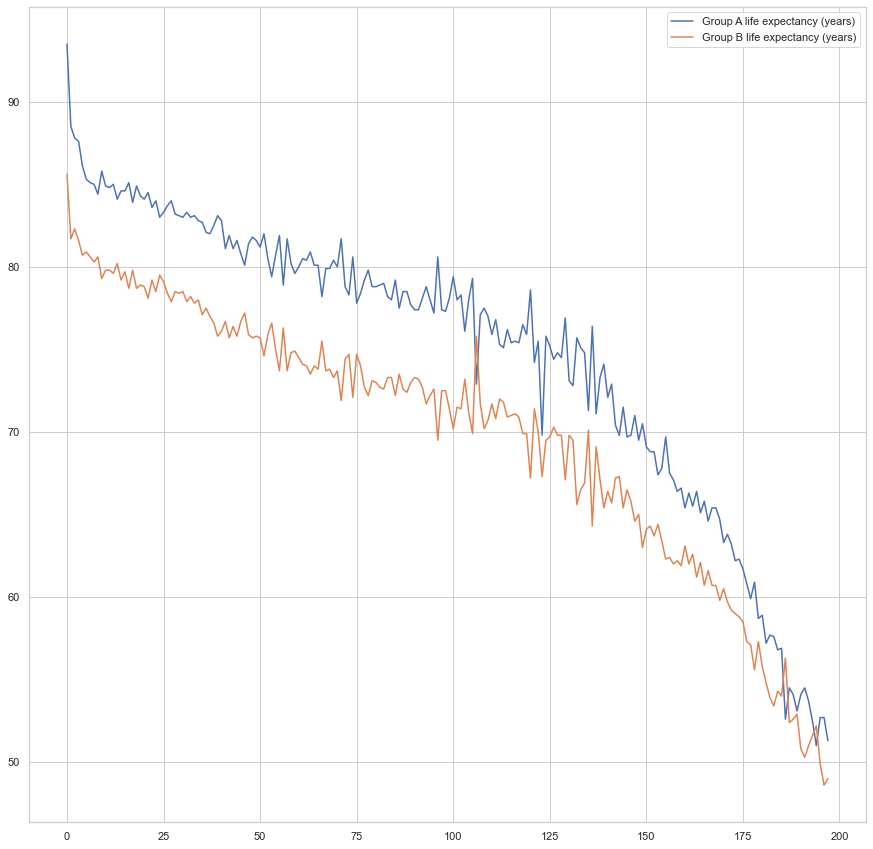

In [332]:
dataset.plot(figsize = (15,15))

In [334]:
dataset = data[['Group A life expectancy (years)','Group B life expectancy (years)']]

In [335]:
data.isna().sum().sum()

0

In [336]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 50 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Country                                                     198 non-null    object 
 1   Group B life expectancy (years)                             198 non-null    float64
 2   Group A life expectancy (years)                             198 non-null    float64
 3   Continent                                                   198 non-null    object 
 4   Region                                                      198 non-null    object 
 5   Surface area (km2)                                          198 non-null    int64  
 6   Population in thousands (2017)                              198 non-null    int64  
 7   Population density (per km2, 2017)                          198 non-null    float64
 8   

In [337]:
data.rename(columns = { 'Life expectancy at birth (females/males, years)':'Life_expectancy' }, inplace = True)

In [338]:
del data['Net Official Development Assist. received (% of GNI)']

In [339]:
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Group B life expectancy (years),0
2,Group A life expectancy (years),0
3,Continent,0
4,Region,0
5,Surface area (km2),0
6,Population in thousands (2017),0
7,"Population density (per km2, 2017)",0
8,GDP: Gross domestic product (million current US$),0
9,"GDP growth rate (annual %, const. 2005 prices)",0


# Describe which features are most likely to impact life expectancy

# correlation coefficients: removes duplicate features

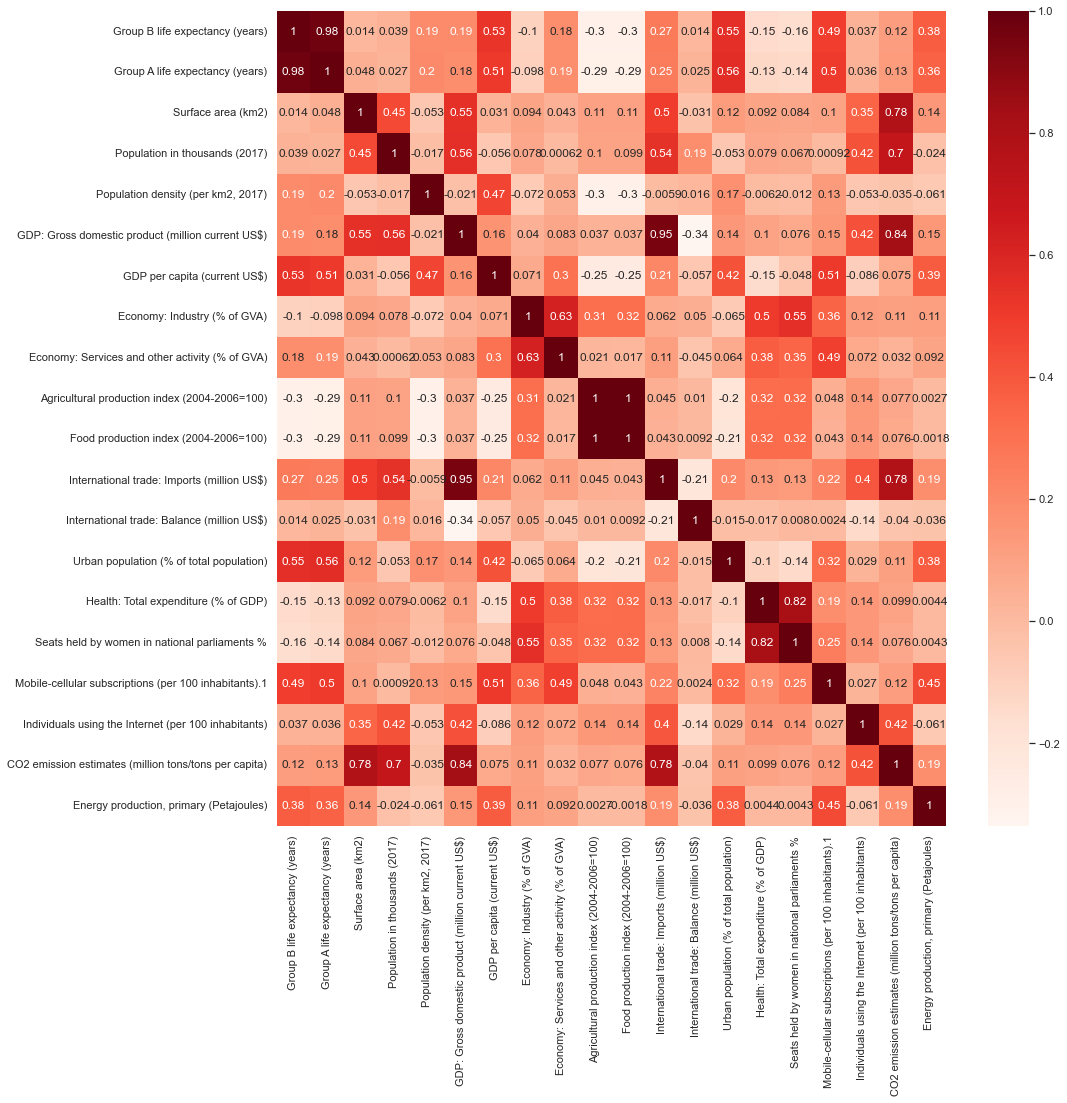

In [340]:
#data.corr()['Life_expectancy'].sort_values(ascending=False)
plt.figure(figsize=(15,15))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# chi-square: 
used for classification. It is a statistical test of independence to determine the dependency of two variables.

In [341]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)

In [342]:
X = data.drop(['Life_expectancy'], axis = 1)

In [343]:
y = data[ 'Life_expectancy']

In [344]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [345]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# TOP 10 Features which Impact Life Expectancy 
                      

In [346]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Top 10 Features which impact Group A Life Expentancy','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

   Top 10 Features which impact Group A Life Expentancy        Score
36  Education: Tertiary gross enrol. ratio (f/m pe...    8508.521689
43  CO2 emission estimates (million tons/tons per ...    7883.642608
34  Education: Primary gross enrol. ratio (f/m per...    7537.835364
45              Energy supply per capita (Gigajoules)    7512.740525
35  Education: Secondary gross enrol. ratio (f/m p...    7464.810582
47  Pop. using improved sanitation facilities (urb...    7377.669076
46  Pop. using improved drinking water (urban/rura...    7271.024450
21         International trade: Imports (million US$)    6979.082958
29  Refugees and others of concern to UNHCR (in th...    6854.596748
8   GDP: Gross domestic product (million current US$)    6794.162842


# TOP 10 Features which Least Impact Life Expectancy
                               

In [347]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features Least impact Life Expentancy','Score']  #naming the dataframe columns
print(featureScores.nsmallest(10,'Score'))   #print 10 least impact features

              Features Least impact Life Expentancy        Score
3                                         Continent   241.658093
4                                            Region   820.036359
24        Population growth rate (average annual %)  1185.315989
26  Urban population growth rate (average annual %)  1842.854052
9    GDP growth rate (annual %, const. 2005 prices)  1951.256729
19            Food production index (2004-2006=100)  2093.138047
18    Agricultural production index (2004-2006=100)  2162.278797
32               Health: Physicians (per 1000 pop.)  2880.991771
33     Education: Government expenditure (% of GDP)  3013.364106
31             Health: Total expenditure (% of GDP)  3021.615553


# Total Feature Scores 

In [348]:
featureScores

,Features Least impact Life Expentancy,Score
0,Country,6180.994440
1,Group B life expectancy (years),3649.098440
2,Group A life expectancy (years),4004.594399
3,Continent,241.658093
4,Region,820.036359
5,Surface area (km2),6441.353396
6,Population in thousands (2017),6599.502099
7,"Population density (per km2, 2017)",6086.111587
8,GDP: Gross domestic product (million current US$),6794.162842
9,"GDP growth rate (annual %, const. 2005 prices)",1951.256729


In [349]:
X = data.drop(['Life_expectancy'], axis = 1)

In [350]:
Y = data['Life_expectancy']

# Information gain or mutual information: 
assess the dependency of the independent variable in predicting the target variable. In other words, it determines the ability of the independent features to predict the target variable.

In [351]:
def find_mi_scores(X, Y):
    mi_scores = mutual_info_regression(X, Y)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [352]:
mi_scores = find_mi_scores(X, Y)
mi_scores

Group A life expectancy (years)                               0.852360
Group B life expectancy (years)                               0.727543
Population age distribution (0-14 / 60+ years, %)             0.561542
Infant mortality rate (per 1000 live births                   0.425291
Mobile-cellular subscriptions (per 100 inhabitants).1         0.400500
GDP per capita (current US$)                                  0.379421
International trade: Imports (million US$)                    0.319860
Population growth rate (average annual %)                     0.309779
Pop. using improved drinking water (urban/rural, %)           0.289190
Employment: Services (% of employed)                          0.266962
Urban population (% of total population)                      0.254674
Pop. using improved sanitation facilities (urban/rural, %)    0.250199
Continent                                                     0.249194
GDP: Gross domestic product (million current US$)             0.231735
Energy

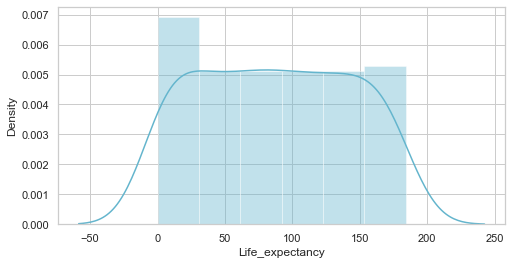

In [353]:
# Before proceeding with feature elimination lets have a look at the distribution of our 'Y'
import seaborn as sns
sns.set(style='whitegrid')
f,ax = plt.subplots(1,1,figsize = (8,4))
ax = sns.distplot(data['Life_expectancy'], kde = True, color = 'c')

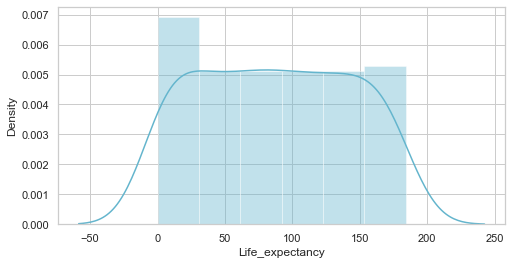

In [354]:
# Before proceeding with feature elimination lets have a look at the distribution of our 'Y'
import seaborn as sns
sns.set(style='whitegrid')
f,ax = plt.subplots(1,1,figsize = (8,4))
ax = sns.distplot(data['Life_expectancy'], kde = True, color = 'c')

# Life Expectancy is normally distributed and is thus fit for prediction using regression Analysis

In [355]:
data

,Country,Group B life expectancy (years),Group A life expectancy (years),Continent,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",...,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)"
0,117,138,141,2,21,1,10,188,51,71,...,163,169,7,0,0,0,0,2,2,0
1,90,136,140,1,4,139,180,163,190,31,...,46,168,137,149,55,97,82,3,3,0
2,158,137,139,1,14,29,83,187,157,40,...,79,150,123,51,146,14,95,2,2,0
3,39,135,138,1,4,194,190,131,191,82,...,169,90,154,46,47,147,61,92,78,2
4,152,133,137,2,18,6,7,175,25,29,...,31,87,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,65,6,2,0,8,128,55,11,76,59,...,94,52,118,169,138,81,49,84,25,31
194,169,7,0,0,16,50,50,86,42,36,...,144,62,17,84,40,17,34,53,48,64
195,0,2,4,1,17,160,154,67,88,7,...,128,18,24,40,182,25,3,21,29,71
196,75,0,4,0,19,69,53,72,18,66,...,138,7,51,156,16,13,14,111,17,106


# Building Models Wihtout Removing Least Impacted Features

# Decision Tree Regressor

In [455]:
le = preprocessing.LabelEncoder()
bankmar = data.apply(le.fit_transform)

In [456]:
X = data.drop(['Life_expectancy'], axis = 1)
Y = data['Life_expectancy']

In [457]:
#from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)


In [458]:
# Build the Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor
data_life = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,max_features=None, max_leaf_nodes=None,min_impurity_decrease=0.0,min_samples_leaf=1, min_samples_split=2,
min_weight_fraction_leaf=0.0, random_state=0, splitter='best')




data_life.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', random_state=0)

In [459]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
print('Training Accuracy :',model.score(X_train, Y_train)*100)
print('Test Accuracy :',model.score(X_test, Y_test)*100)

Training Accuracy : 100.0
Test Accuracy : 59.865856550229665


In [460]:
params = data_life.get_params()
print(params)

{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}


In [461]:
Y_pred = data_life.predict(X_test)

In [462]:
from sklearn.metrics import r2_score
print('r2:',r2_score(Y_test, Y_pred))

r2: 0.6415943748221185


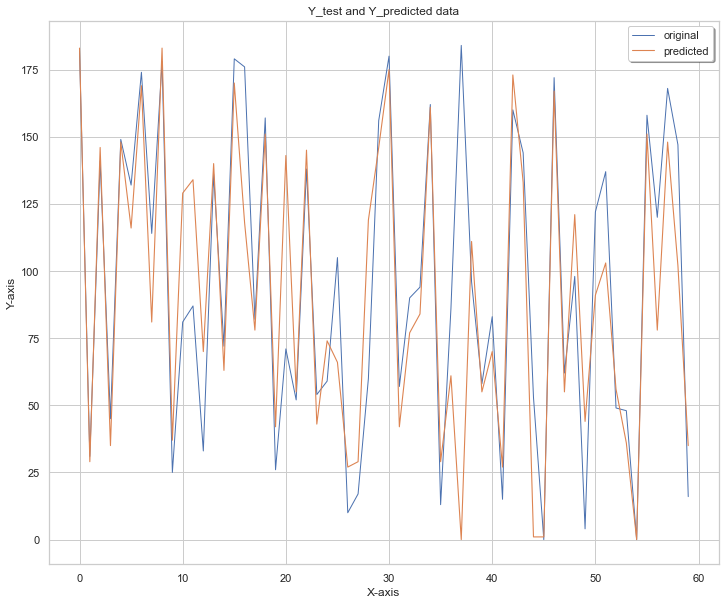

In [463]:
x_ax = range(len(Y_test))
plt.figure(figsize=(12,10))
plt.plot(x_ax, Y_test, linewidth=1, label="original")
plt.plot(x_ax, Y_pred, linewidth=1.1, label="predicted")
plt.title("Y_test and Y_predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [464]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 20.9
Root Mean Squared Error: 34.26271053686987


# RandomForestRegressor

In [465]:
X1 = data.drop(['Life_expectancy'], axis = 1)
Y1= data['Life_expectancy']

In [466]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state=0)
X_train1 = X_train1.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [467]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=None, max_features='auto', 
                              max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, 
                              min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, 
                              n_jobs=None, oob_score=False, random_state=42, verbose=0, warm_start=False)

rf.fit(X_train1, Y_train1.values.ravel())
                                   

RandomForestRegressor(criterion='mse', random_state=42)

In [468]:
model = RandomForestRegressor()
model.fit(X_train, Y_train)
print('Training Accuracy :',model.score(X_train, Y_train)*100)
print('Test Accuracy :',model.score(X_test, Y_test)*100)

Training Accuracy : 96.15680434527113
Test Accuracy : 68.47484662753584


In [469]:
Y_pred1 = rf.predict(X_test1)

In [470]:
from sklearn.metrics import r2_score
print('r2:', r2_score(Y_test1, Y_pred1))

r2: 0.5015297020170612


In [471]:
r_sq1 = rf.score(X_train1, Y_train1)
print('coefficient of determination:', r_sq1)

coefficient of determination: 0.9700579479712069


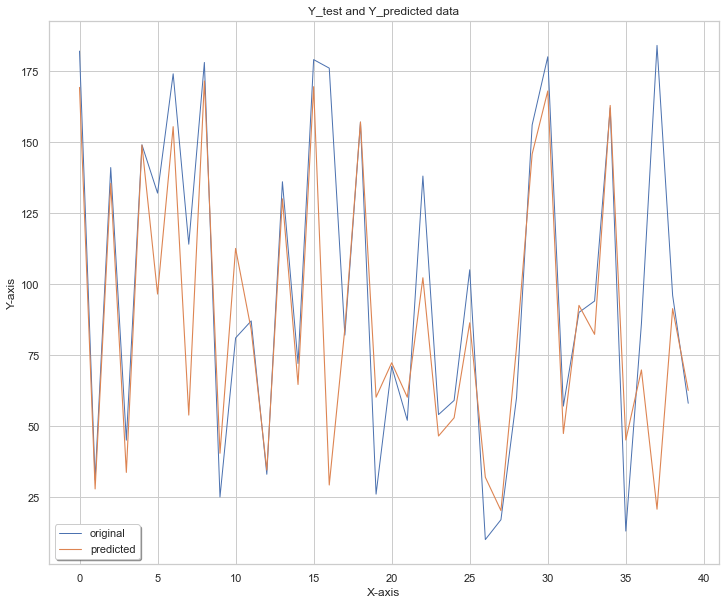

In [472]:
x_ax = range(len(Y_test1))
plt.figure(figsize=(12,10))
plt.plot(x_ax, Y_test1, linewidth=1, label="original")
plt.plot(x_ax, Y_pred1, linewidth=1.1, label="predicted")
plt.title("Y_test and Y_predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [473]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test1, Y_pred1))
#print('Mean Squared Error:', metrics.mean_squared_error(Y_test1, Y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test1, Y_pred1)))

Mean Absolute Error: 19.994500000000002
Mean Squared Error: 1520.88148
Root Mean Squared Error: 38.99848048321883


# LinearRegression

In [474]:
X2 = data.drop(['Life_expectancy'], axis = 1)
Y2 = data['Life_expectancy']

In [475]:
# Split the dataset train and test to build regression model
from sklearn.model_selection import train_test_split
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size = 0.3, random_state = 0)

In [476]:
# Build the Regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
reg.fit(X_train2, Y_train2)

LinearRegression(normalize=False)

In [477]:
model = LinearRegression()
model.fit(X_train, Y_train)
print('Training Accuracy :',model.score(X_train, Y_train)*100)
print('Test Accuracy :',model.score(X_test, Y_test)*100)

Training Accuracy : 83.4608067309944
Test Accuracy : 59.29770145840323


In [478]:
# Predict values
Y_pred2 = reg.predict(X_test2)

In [479]:
from sklearn.metrics import r2_score
print('r2:', r2_score(Y_test2, Y_pred2))

r2: 0.5929770145840323


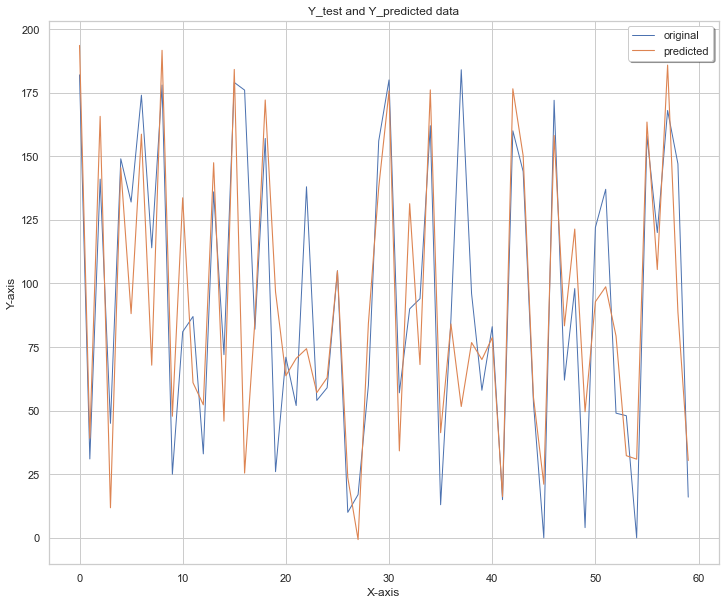

In [480]:
x_ax = range(len(Y_test2))
plt.figure(figsize=(12,10))
plt.plot(x_ax, Y_test2, linewidth=1, label="original")
plt.plot(x_ax, Y_pred2, linewidth=1.1, label="predicted")
plt.title("Y_test and Y_predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [483]:
# Calculate the MAE, MSE, RMSE errors
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test2, Y_pred2))
#print('Mean Squared Error:', metrics.mean_squared_error(Y_test2, Y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test2, Y_pred2)))
#print('mean_absolute_percentage_error:', np.mean(np.abs((Y_test2 - Y_pred2) / Y_test2)))

Mean Absolute Error: 24.77921954610294
Root Mean Squared Error: 36.51268548897145


# Creating Models by Removing Least Impacted Features 

In [484]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features Least impact  Life Expentancy','Score']  #naming the dataframe columns
print(featureScores.nsmallest(10,'Score'))   #print 10 least impact features

             Features Least impact  Life Expentancy        Score
3                                         Continent   241.658093
4                                            Region   820.036359
24        Population growth rate (average annual %)  1185.315989
26  Urban population growth rate (average annual %)  1842.854052
9    GDP growth rate (annual %, const. 2005 prices)  1951.256729
19            Food production index (2004-2006=100)  2093.138047
18    Agricultural production index (2004-2006=100)  2162.278797
32               Health: Physicians (per 1000 pop.)  2880.991771
33     Education: Government expenditure (% of GDP)  3013.364106
31             Health: Total expenditure (% of GDP)  3021.615553


# Decision Tree Regressor

In [485]:
X = data.drop(['Life_expectancy','Continent','Region','Population growth rate (average annual %)','GDP growth rate (annual %, const. 2005 prices)','Urban population growth rate (average annual %)','Food production index (2004-2006=100)','Agricultural production index (2004-2006=100)','Health: Total expenditure (% of GDP)','Education: Government expenditure (% of GDP)','Health: Physicians (per 1000 pop.)'], axis = 1)
Y = data['Life_expectancy']

In [486]:
X.columns

Index(['Country', 'Group B life expectancy (years)',
       'Group A life expectancy (years)', 'Surface area (km2)',
       'Population in thousands (2017)', 'Population density (per km2, 2017)',
       'GDP: Gross domestic product (million current US$)',
       'GDP per capita (current US$)', 'Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Employment: Agriculture (% of employed)',
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Balance of payments, current account (million US$)',
       'Urban population (% of total population)',
       'Population age distribution (0-14 / 60+ years, %)',
       'International migrant stock (000/% of total pop

In [487]:
#from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [488]:
# Build the Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor
data_life = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,max_features=None, max_leaf_nodes=None,min_impurity_decrease=0.0,min_samples_leaf=1, min_samples_split=2,
min_weight_fraction_leaf=0.0, random_state=0, splitter='best')




data_life.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', random_state=0)

In [489]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
print('Training Accuracy :',model.score(X_train, Y_train)*100)
print('Test Accuracy :',model.score(X_test, Y_test)*100)

Training Accuracy : 100.0
Test Accuracy : 66.77232419538186


In [490]:
Y_pred = data_life.predict(X_test)

In [491]:
# Calculate the R square values , Intercept and slope coefficients
r_sq2 =data_life.score(X_train, Y_train)
print('coefficient of determination:', r_sq2)

coefficient of determination: 1.0


In [514]:
from sklearn.metrics import r2_score
print('r2:',r2_score(Y_test, Y_pred))

r2: 0.6339261756463693


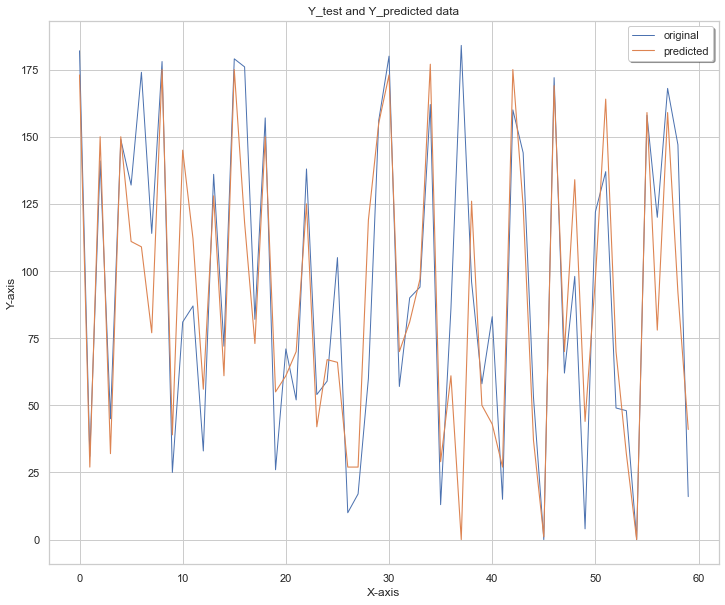

In [493]:
x_ax = range(len(Y_test))
plt.figure(figsize=(12,10))
plt.plot(x_ax, Y_test, linewidth=1, label="original")
plt.plot(x_ax, Y_pred, linewidth=1.1, label="predicted")
plt.title("Y_test and Y_predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [515]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 22.05
Root Mean Squared Error: 34.62730136756256


# Random Forest Regressor

In [516]:
X1 = data.drop(['Life_expectancy','Continent','Region','Population growth rate (average annual %)','GDP growth rate (annual %, const. 2005 prices)','Urban population growth rate (average annual %)','Food production index (2004-2006=100)','Agricultural production index (2004-2006=100)','Health: Total expenditure (% of GDP)','Education: Government expenditure (% of GDP)','Health: Physicians (per 1000 pop.)'], axis = 1)
Y1 = data['Life_expectancy']

In [517]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.3, random_state=0)
X_train1 = X_train1.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [523]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=None, max_features='auto', 
                              max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, 
                              min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, 
                              n_jobs=None, oob_score=False, random_state=42, verbose=0, warm_start=False)

rf.fit(X_train1, Y_train1.values.ravel())
                                   

RandomForestRegressor(criterion='mse', random_state=42)

In [524]:
model = RandomForestRegressor()
model.fit(X_train, Y_train)
print('Training Accuracy :',model.score(X_train, Y_train)*100)
print('Test Accuracy :',model.score(X_test, Y_test)*100)

Training Accuracy : 95.96141799641043
Test Accuracy : 67.42349240422554


In [525]:
Y_pred1 = rf.predict(X_test1)

In [526]:
from sklearn.metrics import r2_score
print('r2:', r2_score(Y_test1, Y_pred1))

r2: 0.6727774695722939


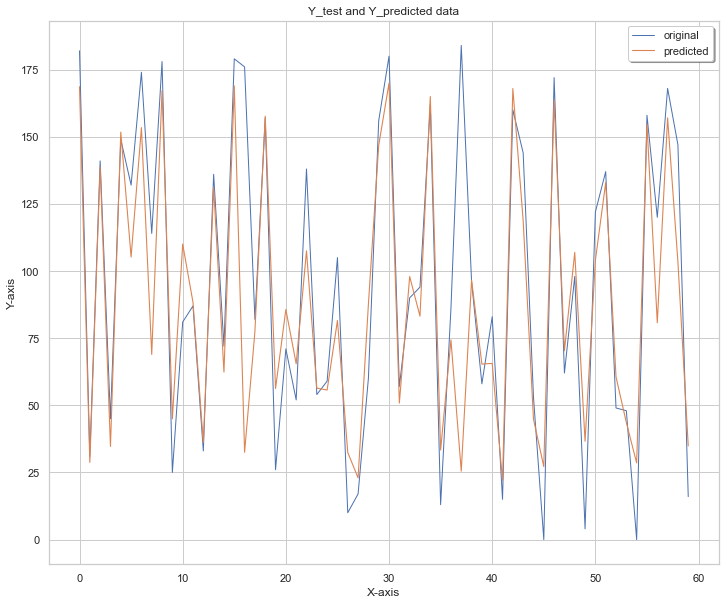

In [527]:
x_ax = range(len(Y_test1))
plt.figure(figsize=(12,10))
plt.plot(x_ax, Y_test1, linewidth=1, label="original")
plt.plot(x_ax, Y_pred1, linewidth=1.1, label="predicted")
plt.title("Y_test and Y_predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [528]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test1, Y_pred1))
#print('Mean Squared Error:', metrics.mean_squared_error(Y_test1, Y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test1, Y_pred1)))

Mean Absolute Error: 18.57366666666667
Root Mean Squared Error: 32.73828370577786


# Linear Regression

In [529]:
X2 = data.drop(['Life_expectancy','Continent','Region','Population growth rate (average annual %)','GDP growth rate (annual %, const. 2005 prices)','Urban population growth rate (average annual %)','Food production index (2004-2006=100)','Agricultural production index (2004-2006=100)','Health: Total expenditure (% of GDP)','Education: Government expenditure (% of GDP)','Health: Physicians (per 1000 pop.)'], axis = 1)
Y2 = data['Life_expectancy']

In [504]:
# Split the dataset train and test to build regression model
from sklearn.model_selection import train_test_split
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size = 0.3, random_state = 0)

In [530]:
# Build the Regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
reg.fit(X_train2, Y_train2)

LinearRegression(normalize=True)

In [531]:
model = LinearRegression(normalize=True)
model.fit(X_train, Y_train)
print('Training Accuracy :',model.score(X_train, Y_train)*100)
print('Test Accuracy :',model.score(X_test, Y_test)*100)

Training Accuracy : 80.50474775603209
Test Accuracy : 61.96912797376386


In [532]:
# Predict values
Y_pred2 = reg.predict(X_test2)

In [533]:
from sklearn.metrics import r2_score
print('r2:', r2_score(Y_test2, Y_pred2))

r2: 0.6196912797376386


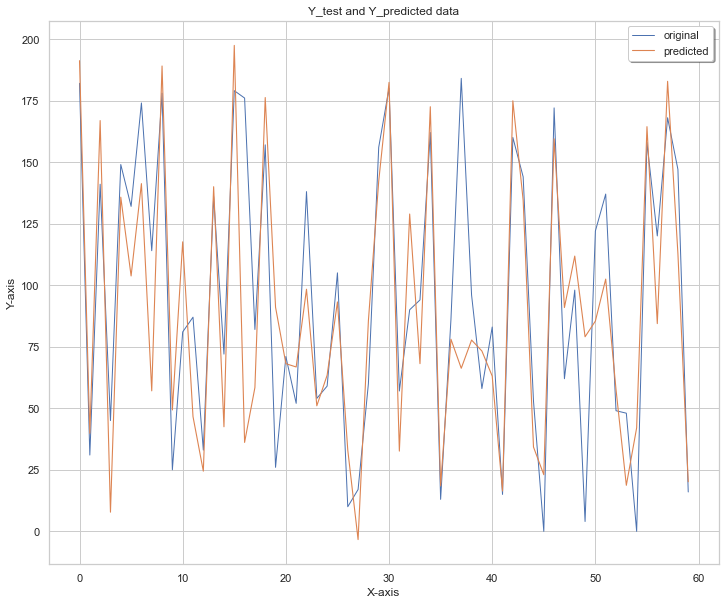

In [511]:
x_ax = range(len(Y_test2))
plt.figure(figsize=(12,10))
plt.plot(x_ax, Y_test2, linewidth=1, label="original")
plt.plot(x_ax, Y_pred2, linewidth=1.1, label="predicted")
plt.title("Y_test and Y_predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [534]:
# Calculate the MAE, MSE, RMSE errors
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test2, Y_pred2))
#print('Mean Squared Error:', metrics.mean_squared_error(Y_test2, Y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test2, Y_pred2)))
#print('mean_absolute_percentage_error:', np.mean(np.abs((Y_test2 - Y_pred2) / Y_test2)))

Mean Absolute Error: 25.380947890068576
Root Mean Squared Error: 35.294127510670045


# The r2_score function computes the coefficient of determination, usually denoted as R².

It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.

As such variance is dataset dependent, R² may not be meaningfully comparable across different datasets. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R² score of 0.0.

# Removing 3 least Impacted Features 

In [291]:
def find_best_model(X, Y):
    algos={
        'linear_reg':{'model':LinearRegression(), 'params':{'normalize':[True, False]}},
        'lasso':{'model':Lasso(), 'params':{'alpha':[1,2], 'selection':['random', 'cyclic']}},
        'decision_tree':{'model':DecisionTreeRegressor(), 'params':{'criterion':['mse','friedman_mse'],'splitter':['best','random']}},
        'random_forest':{'model':RandomForestRegressor(), 'params':{'n_jobs':[-1], 'n_estimators':[10, 50, 100],'max_depth':[5,10,20], 'max_leaf_nodes':[50, 100]}},
        'xgb':{'model':XGBRegressor(), 'params':{'n_jobs':[-1], 'n_estimators':[10,50,100],'max_depth':[5,10,20],'max_leaf_nodes':[50,100],'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.55],'booster':['gblinear']}}
            }
    scores = []
    cv = ShuffleSplit(n_splits=5, random_state=42, test_size=0.2)
    for algo, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, Y)
        scores.append({
            'model':algo,
            'best_score': gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score', 'best_params'])
models_summary = find_best_model(X, Y)

[06:41:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:41:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:41:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_depth",

In [292]:
models_summary

,model,best_score,best_params
0,linear_reg,0.592708,{'normalize': True}
1,lasso,0.609080,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.547831,"{'criterion': 'mse', 'splitter': 'best'}"
3,random_forest,0.753620,"{'max_depth': 20, 'max_leaf_nodes': 50, 'n_est..."
4,xgb,0.697561,"{'booster': 'gblinear', 'learning_rate': 0.1, ..."


# Removing 10 least impacts

In [293]:
X = data.drop(['Life_expectancy','Continent','Region','Population growth rate (average annual %)','GDP growth rate (annual %, const. 2005 prices)','Urban population growth rate (average annual %)','Food production index (2004-2006=100)','Agricultural production index (2004-2006=100)','Health: Total expenditure (% of GDP)','Education: Government expenditure (% of GDP)','Health: Physicians (per 1000 pop.)'], axis = 1)
Y = data['Life_expectancy']

In [294]:
def find_best_model(X, Y):
    algos={
        'linear_reg':{'model':LinearRegression(), 'params':{'normalize':[True, False]}},
        'lasso':{'model':Lasso(), 'params':{'alpha':[1,2], 'selection':['random', 'cyclic']}},
        'decision_tree':{'model':DecisionTreeRegressor(), 'params':{'criterion':['mse','friedman_mse'],'splitter':['best','random']}},
        'random_forest':{'model':RandomForestRegressor(), 'params':{'n_jobs':[-1], 'n_estimators':[10, 50, 100],'max_depth':[5,10,20], 'max_leaf_nodes':[50, 100]}},
        'xgb':{'model':XGBRegressor(), 'params':{'n_jobs':[-1], 'n_estimators':[10,50,100],'max_depth':[5,10,20],'max_leaf_nodes':[50,100],'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.55],'booster':['gblinear']}}
            }
    scores = []
    cv = ShuffleSplit(n_splits=5, random_state=42, test_size=0.2)
    for algo, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, Y)
        scores.append({
            'model':algo,
            'best_score': gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score', 'best_params'])
models_summary = find_best_model(X, Y)

[06:42:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:42:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:42:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_depth",

In [295]:
models_summary

,model,best_score,best_params
0,linear_reg,0.617451,{'normalize': False}
1,lasso,0.625715,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.526926,"{'criterion': 'mse', 'splitter': 'best'}"
3,random_forest,0.751563,"{'max_depth': 20, 'max_leaf_nodes': 50, 'n_est..."
4,xgb,0.688603,"{'booster': 'gblinear', 'learning_rate': 0.1, ..."


In [207]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features Least impact Life Expentancy','Score']  #naming the dataframe columns
print(featureScores.nsmallest(10,'Score')) 

              Features Least impact Life Expentancy        Score
3                                         Continent   241.658093
4                                            Region   820.036359
24        Population growth rate (average annual %)  1185.315989
26  Urban population growth rate (average annual %)  1842.854052
9    GDP growth rate (annual %, const. 2005 prices)  1951.256729
19            Food production index (2004-2006=100)  2093.138047
18    Agricultural production index (2004-2006=100)  2162.278797
32               Health: Physicians (per 1000 pop.)  2880.991771
33     Education: Government expenditure (% of GDP)  3013.364106
31             Health: Total expenditure (% of GDP)  3021.615553


# Removing 5 least impacts 

In [407]:
X = data.drop(['Life_expectancy','Continent','Region','Population growth rate (average annual %)','GDP growth rate (annual %, const. 2005 prices)'], axis = 1)
Y = data['Life_expectancy']

In [408]:
def find_best_model(X, Y):
    algos={
        'linear_reg':{'model':LinearRegression(), 'params':{'normalize':[True, False]}},
        'lasso':{'model':Lasso(), 'params':{'alpha':[1,2], 'selection':['random', 'cyclic']}},
        'decision_tree':{'model':DecisionTreeRegressor(), 'params':{'criterion':['mse','friedman_mse'],'splitter':['best','random']}},
        'random_forest':{'model':RandomForestRegressor(), 'params':{'n_jobs':[-1], 'n_estimators':[10, 50, 100],'max_depth':[5,10,20], 'max_leaf_nodes':[50, 100]}},
        'xgb':{'model':XGBRegressor(), 'params':{'n_jobs':[-1], 'n_estimators':[10,50,100],'max_depth':[5,10,20],'max_leaf_nodes':[50,100],'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.55],'booster':['gblinear']}}
            }
    scores = []
    cv = ShuffleSplit(n_splits=5, random_state=42, test_size=0.2)
    for algo, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, Y)
        scores.append({
            'model':algo,
            'best_score': gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score', 'best_params'])
models_summary = find_best_model(X, Y)

[16:49:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:49:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:49:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_depth",

In [409]:
models_summary

,model,best_score,best_params
0,linear_reg,0.595688,{'normalize': False}
1,lasso,0.610869,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.507719,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
3,random_forest,0.746994,"{'max_depth': 5, 'max_leaf_nodes': 100, 'n_est..."
4,xgb,0.688839,"{'booster': 'gblinear', 'learning_rate': 0.1, ..."


In [212]:
X

,Country,Group B life expectancy (years),Group A life expectancy (years),Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)",GDP: Gross domestic product (million current US$),GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,117,138,141,1,10,188,51,190,0,20,...,169,7,0,0,0,0,2,2,0,0
1,90,136,140,139,180,163,190,162,10,76,...,168,137,149,55,97,82,3,3,0,0
2,158,137,139,29,83,187,157,180,130,76,...,150,123,51,146,14,95,2,2,0,0
3,39,135,138,194,190,131,191,107,127,133,...,90,154,46,47,147,61,92,78,2,0
4,152,133,137,6,7,175,25,176,1,112,...,87,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,65,6,2,128,55,11,76,106,82,150,...,52,118,169,138,81,49,84,25,31,0
194,169,7,0,50,50,86,42,62,110,136,...,62,17,84,40,17,34,53,48,64,0
195,0,2,4,160,154,67,88,14,62,62,...,18,24,40,182,25,3,21,29,71,0
196,75,0,4,69,53,72,18,10,100,23,...,7,51,156,16,13,14,111,17,106,0


In [215]:
X.columns

Index(['Country', 'Group B life expectancy (years)',
       'Group A life expectancy (years)', 'Surface area (km2)',
       'Population in thousands (2017)', 'Population density (per km2, 2017)',
       'GDP: Gross domestic product (million current US$)',
       'GDP per capita (current US$)', 'Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Employment: Agriculture (% of employed)',
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Balance of payments, current account (million US$)',
       'Urban population (% of total population)',
       'Population age distribution (0-14 / 60+ years, %)',
       'International migrant stock (000/% of total pop

In [217]:
X = data.drop(['Life_expectancy','Continent','Region','Net Official Development Assist. received (% of GNI)','Population growth rate (average annual %)','GDP growth rate (annual %, const. 2005 prices)','Urban population growth rate (average annual %)','Food production index (2004-2006=100)','Agricultural production index (2004-2006=100)','Education: Government expenditure (% of GDP)','Population age distribution (0-14 / 60+ years, %)','Pop. using improved sanitation facilities (urban/rural, %)'], axis = 1)
Y = data['Life_expectancy']

In [218]:
def find_best_model(X, Y):
    algos={
        'linear_reg':{'model':LinearRegression(), 'params':{'normalize':[True, False]}},
        'lasso':{'model':Lasso(), 'params':{'alpha':[1,2], 'selection':['random', 'cyclic']}},
        'decision_tree':{'model':DecisionTreeRegressor(), 'params':{'criterion':['mse','friedman_mse'],'splitter':['best','random']}},
        'random_forest':{'model':RandomForestRegressor(), 'params':{'n_jobs':[-1], 'n_estimators':[10, 50, 100],'max_depth':[5,10,20], 'max_leaf_nodes':[50, 100]}},
        'xgb':{'model':XGBRegressor(), 'params':{'n_jobs':[-1], 'n_estimators':[10,50,100],'max_depth':[5,10,20],'max_leaf_nodes':[50,100],'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.55],'booster':['gblinear']}}
            }
    scores = []
    cv = ShuffleSplit(n_splits=5, random_state=42, test_size=0.2)
    for algo, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, Y)
        scores.append({
            'model':algo,
            'best_score': gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score', 'best_params'])
models_summary = find_best_model(X, Y)

[06:34:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:34:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:34:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_depth",

In [219]:
models_summary

,model,best_score,best_params
0,linear_reg,0.620312,{'normalize': False}
1,lasso,0.630258,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.618740,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,random_forest,0.744031,"{'max_depth': 5, 'max_leaf_nodes': 100, 'n_est..."
4,xgb,0.686732,"{'booster': 'gblinear', 'learning_rate': 0.1, ..."


In [411]:
Y_train.values,model.predict(X_train)

(array([ 64, 139, 169,  34,  81, 110,  36, 165,  93,  51,  18, 113,  69,
          2,   8,  88, 173, 171,  66,  30,   1,  40,   0, 140, 177, 130,
         43,   5, 153, 167, 126,  79,  24,  23,  44,  80, 128,  97,  38,
          6, 142,   0, 101, 127,  61,   1,  21, 109, 121, 146, 150, 112,
        172,  35,   1,  19,  50,   1,   0, 133, 115,  95, 119, 102, 103,
        107,   9,  91,   0, 129, 106,  68,  41,  37,  39,  89,  22, 175,
         73,  99, 118, 148,  92, 183, 111,  14, 152, 131,  74,  47, 170,
          1,  78,  85,  20,  75, 155, 161, 143,   1, 166,  32,  77,  27,
          0,  65,  56,  70, 159, 100, 104, 135,  67,  46,   7, 124, 145,
        163,  29, 123,  42,  11,  12, 164, 125,  55, 116, 134, 108, 151,
        181,  76,  84, 117,   3,  63, 154,  28]),
 array([ 73.36763497, 129.22074726, 147.61175636,  45.08353206,
         54.3640113 ,  92.60615082,  34.01796732, 161.64619524,
         63.56529678,  26.48826681,  28.64669428, 125.44215743,
         63.11491345,  23.86

In [412]:
Y_test.values,model.predict(X_test)

(array([182,  31, 141,  45, 149, 132, 174, 114, 178,  25,  81,  87,  33,
        136,  72, 179, 176,  82, 157,  26,  71,  52, 138,  54,  59, 105,
         10,  17,  60, 156, 180,  57,  90,  94, 162,  13,  86, 184,  96,
         58,  83,  15, 160, 144,  53,   0, 172,  62,  98,   4, 122, 137,
         49,  48,   0, 158, 120, 168, 147,  16]),
 array([191.19079577,  39.819389  , 166.85395302,   7.79210135,
        135.74830987, 103.74251435, 141.24406078,  57.06917706,
        189.02509684,  49.31289177, 117.59723636,  46.61956993,
         24.45529146, 139.99242408,  42.48387156, 197.38104925,
         36.1294861 ,  58.42198787, 176.21033031,  91.05150071,
         68.10949293,  66.76998867,  98.3469731 ,  51.00795226,
         63.4226629 ,  93.18989644,  33.05296255,  -3.34222316,
         85.57003544, 142.23808496, 182.36500996,  32.59534751,
        128.90124251,  68.11476186, 172.47755986,  18.50116409,
         78.0378645 ,  66.23303061,  77.7050909 ,  73.26077612,
         63.069067